In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/StudentsPerformance_3_lyst1729690388778.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
X=df.drop(columns=['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
Y=df['math score']
Y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [ ]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [ ]:
#creation of transformer columns
#creation of transformer coloumns
num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_trans=StandardScaler()
oh_tran=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_tran,cat_cols),
        ("StandardScaler", num_trans,num_cols),
    ]
)
x=preprocessor.fit_transform(X)
x.shape

(1000, 19)

In [ ]:
#Seperating Train and Test for the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [ ]:
#Creating an evaluate function to give all matrics after model training:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

models={
    "LR":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN": KNeighborsRegressor(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
   # Apply preprocessing
    X_train_processed = preprocessor.transform(x_train)
    X_test_processed = preprocessor.transform(x_test)

    model.fit(X_train_processed,y_train) #train model

    #make predictions
    y_train_pred=model.predict(X_train_processed)
    y_test_pred=model.predict(X_test_processed)



    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Training Performance')
    print("RMSE: {:.4f}".format(model_train_rmse))
    print("MAE: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model Test Performance')
    print("RMSE: {:.4f}".format(model_test_rmse))
    print("MAE: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))


    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

LR
Model Training Performance
RMSE: 5.2592
MAE: 4.1681
R2 score: 0.8815
----------------------------------
Model Test Performance
RMSE: 5.6218
MAE: 4.5734
R2 score: 0.8524


Lasso
Model Training Performance
RMSE: 6.5500
MAE: 5.1997
R2 score: 0.8162
----------------------------------
Model Test Performance
RMSE: 6.5967
MAE: 5.1005
R2 score: 0.7967


Ridge
Model Training Performance
RMSE: 5.2594
MAE: 4.1672
R2 score: 0.8815
----------------------------------
Model Test Performance
RMSE: 5.6191
MAE: 4.5672
R2 score: 0.8525


KNN
Model Training Performance
RMSE: 5.7614
MAE: 4.5627
R2 score: 0.8578
----------------------------------
Model Test Performance
RMSE: 7.1280
MAE: 5.7440
R2 score: 0.7627


DT
Model Training Performance
RMSE: 0.1250
MAE: 0.0063
R2 score: 0.9999
----------------------------------
Model Test Performance
RMSE: 8.5551
MAE: 6.9500
R2 score: 0.6581


RF
Model Training Performance
RMSE: 2.2817
MAE: 1.7902
R2 score: 0.9777
----------------------------------
Model Test Perfo

In [ ]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','R2_Score']).sort_values(by=["R2_Score"],ascending=False )

,model name,R2_Score
2,Ridge,0.852517
0,LR,0.852377
5,RF,0.803653
1,Lasso,0.796734
3,KNN,0.762676
4,DT,0.658130


In [ ]:
#Linear regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train_processed,y_train)
y_pred=lin_model.predict(X_test_processed)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %2f" %score)

Accuracy of the model is 85.237656


Text(0, 0.5, 'Predicted')

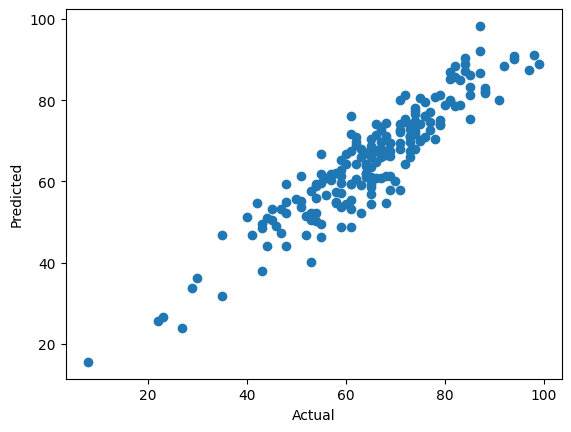

In [ ]:
#plot pred And y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

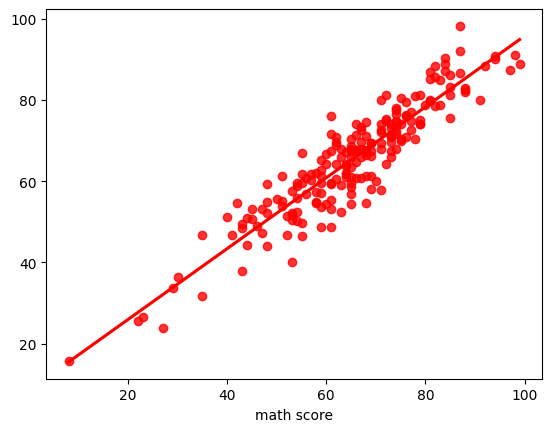

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'predicted value':y_pred,'differemce':y_test-y_pred})
pred_df

,Actual Value,predicted value,differemce
519,67,66.003977,0.996023
837,75,69.919265,5.080735
208,74,67.990259,6.009741
525,68,71.094116,-3.094116
978,55,49.586599,5.413401
...,...,...,...
647,64,61.992020,2.007980
481,52,46.828127,5.171873
134,74,73.568230,0.431770
366,69,57.981808,11.018192
